In [1]:
import numpy as np
import matplotlib.pyplot as plt

import json
import h5py
import os
import scipy.io

%matplotlib inline


In [2]:
import pyusct
#from pyusct.rfdata import RFdata, 
from pyusct.preprocess import  preprocess

# parameters

In [5]:
result_path = "/mnt/nas/2017-12-18_1/"
param_path = os.path.join(result_path, 'param.json')

In [6]:
with open(param_path, 'r') as f: param = json.load(f)
print(json.dumps(param, indent=4))

{
    "ringarray": {
        "num_points": 256, 
        "radius": 0.05
    }, 
    "source": {
        "point_map": [
            1, 
            17, 
            33, 
            49, 
            65, 
            81, 
            97, 
            113, 
            129, 
            145, 
            161, 
            177, 
            193, 
            209, 
            225, 
            241
        ], 
        "waveform": {
            "wavenum": 1, 
            "magnitude": 50, 
            "type": "sinusoidal", 
            "freq": 2000000.0, 
            "wavenum_offset": 2
        }
    }, 
    "grid": {
        "Nx": 1024, 
        "Ny": 1024, 
        "dx": 0.000125, 
        "dy": 0.000125
    }, 
    "io": {
        "save_movie": true
    }, 
    "sensor": {
        "freq": 40000000.0
    }, 
    "t_end": 0.0001
}


## sampling points

### True medium distributions

## preprocess

In [7]:
map_speed, map_dens, mat_pre = preprocess(result_path, points, offset = 1)

NameError: name 'x' is not defined

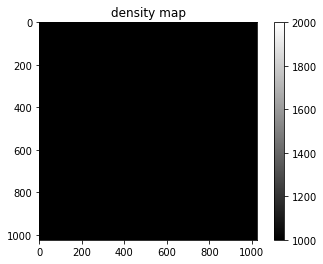

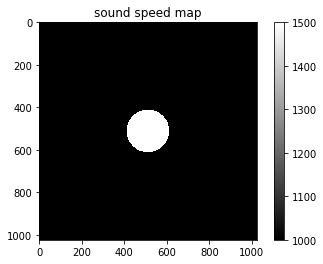

In [7]:
map_speed = h5py.File(medium_path, "r")["medium"]["sound_speed"]
map_dens = h5py.File(medium_path, "r")["medium"]["density"]

plt.imshow(map_dens, cmap='gray')
plt.plot()
plt.colorbar()
plt.title("density map")
plt.show()
plt.imshow(map_speed, cmap='gray')
plt.colorbar()
plt.title("sound speed map")
plt.show()

## RF data loading

In [8]:
rf = RFdata(
    pos = arr_pos,
    data = mat_rfdata,
    src = np.array(param["source"]["point_map"])-1,
    rcv = np.arange(param["ringarray"]["num_points"]),
    dt = 1.0/param["sensor"]["freq"],
    c = np.mean(map_speed)
)

In [9]:
ix = np.random.randint(300, 700)
iy = np.random.randint(400, 600)
(ix, iy)

(406, 405)

In [10]:
x = ix * param["grid"]["dx"]
y = iy * param["grid"]["dy"]
(x, y)

(0.05075, 0.050625)

In [14]:
offset_array = np.arange(-50, 50, 1)
target = np.array([y,x])

In [17]:
rf_sub = rf.getPointSubset(target, offset_array)

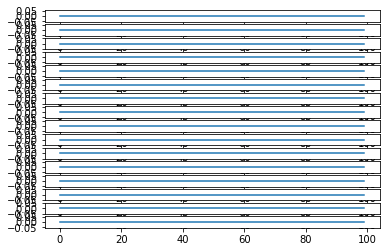

In [18]:
for tx in range(16):
    plt.subplot(16, 1 , tx+1)
    plt.plot(rf_sub[tx, 0, :])